In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv(r'C:\Users\pc\Desktop\Python\Coffee Sales Analysis\orders.csv')
customers = pd.read_csv(r'C:\Users\pc\Desktop\Python\Coffee Sales Analysis\customers.csv')
products = pd.read_csv(r'C:\Users\pc\Desktop\Python\Coffee Sales Analysis\products.csv')

In [3]:
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2,NaN,NaN,NaN
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5,NaN,NaN,957.0
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,NaN,NaN,NaN
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,NaN,NaN,NaN
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN


In [4]:
customers.head()

,Customer ID,Customer Name,Email,Phone Number,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,aallner0@lulu.com,+1 (862) 817-0124,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,pbote1@yelp.com,+353 (913) 396-4653,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,jredholes2@tmall.com,+1 (210) 986-6806,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,dazema3@facebook.com,+1 (217) 418-0714,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,NaN,+353 (698) 362-9201,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [5]:
products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     1000 non-null   object 
 1   Order Date   1000 non-null   object 
 2   Customer ID  1000 non-null   object 
 3   Product ID   1000 non-null   object 
 4   Quantity     1000 non-null   int64  
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   1 non-null      float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


In [7]:
orders.describe()

,Quantity,Unnamed: 5,Unnamed: 6,Unnamed: 7
count,1000.000000,0.0,0.0,1.0
mean,3.551000,NaN,NaN,957.0
std,1.681733,NaN,NaN,NaN
min,1.000000,NaN,NaN,957.0
25%,2.000000,NaN,NaN,957.0
50%,4.000000,NaN,NaN,957.0
75%,5.000000,NaN,NaN,957.0
max,6.000000,NaN,NaN,957.0


In [8]:
orders.shape # getting to know the number of rows and columns

(1000, 8)

In [9]:
# Function to check the number of null values in a df
def checkNullValues (dataframe):
    nullValues = customers.isnull().sum()
    print({'nullValues': nullValues})
checkNullValues(customers)

{'nullValues': Customer ID         0
Customer Name       0
Email             204
Phone Number      130
Address Line 1      0
City                0
Country             0
Postcode            0
Loyalty Card        0
dtype: int64}


In [10]:
# Dropping the columns email and Phone Number from the customers table
customers.drop(columns=['Email', 'Phone Number'], inplace=True)
customers.head()

,Customer ID,Customer Name,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [11]:
checkNullValues(customers)

{'nullValues': Customer ID       0
Customer Name     0
Address Line 1    0
City              0
Country           0
Postcode          0
Loyalty Card      0
dtype: int64}


## Analysis Questions

### 1. How many `orders` were placed and how many were unique orders

In [12]:
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2,NaN,NaN,NaN
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5,NaN,NaN,957.0
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,NaN,NaN,NaN
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,NaN,NaN,NaN
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN


In [13]:
orders.shape # determining the number of orders placed

(1000, 8)

In [14]:
# As the order ID is unique, we will use the order ID to determine the number of unique orders
ordersPlaced = orders['Order ID'].nunique()
ordersPlaced

957

### 2. How many customers ordered **more than once**?

In [15]:
customerOrderCounts = orders.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False)
customersMultipleOrders = len(customerOrderCounts[customerOrderCounts > 1])
print(f"There are {customersMultipleOrders} customers who placed multiple orders")

There are 52 customers who placed multiple orders


##### Of the 913 customers, 52 were returning clients

### 3. Who are these repeat customers (name, country, and Customer ID)

In [16]:
'''
Since some of the customer attributes are in the Customer table,
we need to perform some join from the Customer table to the Order table,
bringing the attributes to the Orders table
'''
customers.head()

,Customer ID,Customer Name,Address Line 1,City,Country,Postcode,Loyalty Card
0,17670-51384-MA,Aloisia Allner,57999 Pepper Wood Alley,Paterson,United States,7505,Yes
1,73342-18763-UW,Piotr Bote,2112 Ridgeway Hill,Crumlin,Ireland,D6W,No
2,21125-22134-PX,Jami Redholes,5214 Bartillon Park,San Antonio,United States,78205,Yes
3,71253-00052-RN,Dene Azema,27 Maywood Place,Springfield,United States,62711,Yes
4,23806-46781-OU,Christoffer O' Shea,38980 Manitowish Junction,Cill Airne,Ireland,N41,No


In [17]:
# Performing a left join, returning all the Orders elements and some variables from the customer table
ordersWithCustomers = pd.merge(
    orders, 
    customers[['Customer ID', 'Customer Name', 'Country']],
    left_on='Customer ID',
    right_on='Customer ID',
    how='left'
    )
ordersWithCustomers

,Order ID,Order Date,Customer ID,Product ID,Quantity,Unnamed: 5,Unnamed: 6,Unnamed: 7,Customer Name,Country
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2,NaN,NaN,NaN,Aloisia Allner,United States
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5,NaN,NaN,957.0,Aloisia Allner,United States
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,NaN,NaN,NaN,Jami Redholes,United States
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,NaN,NaN,NaN,Christoffer O' Shea,Ireland
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,NaN,NaN,NaN,Christoffer O' Shea,Ireland
...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,1/06/2020,43014-53743-XK,R-L-2.5,1,NaN,NaN,NaN,Jennica Tewelson,United States
996,AEZ-13242-456,5/04/2022,62494-09113-RP,R-M-0.5,5,NaN,NaN,NaN,Marguerite Graves,United States
997,UME-75640-698,10/11/2019,62494-09113-RP,A-M-0.5,4,NaN,NaN,NaN,Marguerite Graves,United States
998,GJC-66474-557,8/03/2021,64965-78386-MY,A-D-1,1,NaN,NaN,NaN,Nicolina Jenny,United States


In [18]:
customerOrderCounts = orders.groupby('Customer ID')['Order ID'].count().sort_values(ascending=False)
customersMultipleOrders = customerOrderCounts[customerOrderCounts > 1]
repeatCustomers = pd.merge(
    customers,
    customersMultipleOrders.reset_index(),
    left_on='Customer ID',
    right_on='Customer ID',
    how='inner'
)

repeatCustomersTable = repeatCustomers[['Customer ID', 'Customer Name', 'City', 'Country', 'Order ID']].sort_values(by='Order ID', ascending=False)
repeatCustomersTable

,Customer ID,Customer Name,City,Country,Order ID
48,86579-92122-OC,Brenn Dundredge,Oklahoma City,United States,7
34,94091-86957-HX,Jimmy Dymoke,Beaumont,Ireland,5
24,66458-91190-YC,Marja Urion,Virginia,Ireland,5
9,16982-35708-BZ,Nealson Cuttler,Washington,United States,5
51,62494-09113-RP,Marguerite Graves,Fort Smith,United States,4
16,43439-94003-DW,Flynn Antony,Birmingham,United States,4
29,05325-97750-WP,Cody Verissimo,Upton,United Kingdom,4
23,22721-63196-UJ,Gladi Ducker,Belfast,United Kingdom,4
22,27132-68907-RC,Ailey Brash,Flushing,United States,4
19,16880-78077-FB,Terri Farra,Odessa,United States,4


##### Brenn Dundredge from The United States, Oklahoma City, was the top returning client with a total of 7 orders placed

### 4. Which country did most returning clients come from?

In [19]:
countryReturning = repeatCustomersTable.groupby('Country')['Order ID'].count().sort_values(ascending=False)
countryReturning

Country
United States     40
Ireland            7
United Kingdom     5
Name: Order ID, dtype: int64

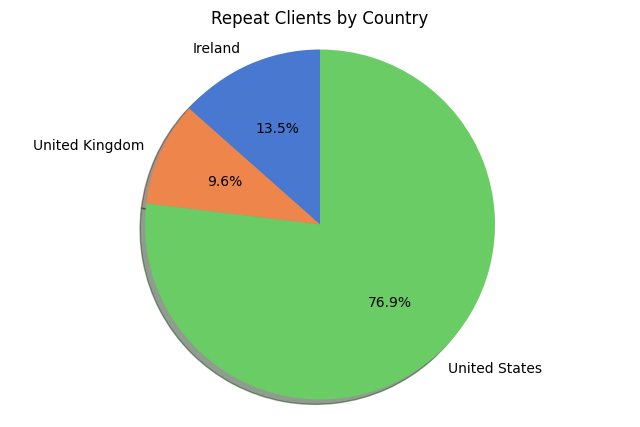

In [20]:
countryReturning = repeatCustomersTable.groupby('Country')['Order ID'].count()
data = countryReturning.values
labels = countryReturning.index.tolist()
colors = sns.color_palette('muted')
plt.figure(figsize=(8,5))
plt.pie(data, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, shadow=True)
plt.axis('equal')
plt.title('Repeat Clients by Country')
plt.show()


#### The United States was the country where most repeat clients originated from

### 5. Which `product` was **mostly** ordered?

In [21]:
products.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [22]:
products['Coffee Type'].unique()

array(['Ara', 'Rob', 'Lib', 'Exc'], dtype=object)

In [23]:
orders.drop(columns=['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'], inplace=True)
orders.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2


In [24]:
# we must perform a join using the Product ID from the Products table and the Orders table
productsOrderMerge = pd.merge(
    orders,
    products[['Product ID', 'Coffee Type','Unit Price']],
    left_on='Product ID',
    right_on='Product ID',
    how='left'
)

productsOrderMerge

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2,Rob,9.950
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5,Exc,8.250
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,Ara,12.950
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,Exc,13.750
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,Rob,27.485
...,...,...,...,...,...,...,...
995,RLM-96511-467,1/06/2020,43014-53743-XK,R-L-2.5,1,Rob,27.485
996,AEZ-13242-456,5/04/2022,62494-09113-RP,R-M-0.5,5,Rob,5.970
997,UME-75640-698,10/11/2019,62494-09113-RP,A-M-0.5,4,Ara,6.750
998,GJC-66474-557,8/03/2021,64965-78386-MY,A-D-1,1,Ara,9.950


In [25]:
# Answering the analysis question: Which product was mostly ordered?
mostlyOrderedProduct = productsOrderMerge.groupby('Product ID')['Quantity'].sum().sort_values(ascending=False)
mostlyOrderedProduct

Product ID
R-L-0.2    100
A-M-0.5     99
A-M-2.5     97
A-M-1       97
A-D-0.2     97
R-D-0.2     92
L-L-0.2     92
R-L-1       92
E-L-0.5     91
A-D-0.5     89
E-M-1       89
A-L-2.5     86
L-M-0.2     82
L-D-2.5     82
R-M-0.5     81
E-L-1       80
L-L-0.5     78
L-L-1       78
E-D-0.5     78
L-D-0.5     77
L-M-0.5     77
E-L-0.2     76
A-D-2.5     76
E-D-0.2     75
R-D-2.5     74
E-L-2.5     72
A-L-1       72
R-M-1       70
A-L-0.5     70
E-M-0.5     69
R-L-0.5     68
L-M-1       68
R-D-0.5     66
R-L-2.5     66
E-M-2.5     66
E-D-2.5     66
L-D-1       65
A-M-0.2     65
E-D-1       61
L-L-2.5     59
R-M-0.2     59
R-M-2.5     56
L-D-0.2     55
R-D-1       54
A-L-0.2     50
E-M-0.2     49
A-D-1       49
L-M-2.5     41
Name: Quantity, dtype: int64

##### **Robusta** coffee type of roast type large and size 0.2 was the mostly ordered product at 100 <br> followed closely with Arabic type medium-sized 0.5

### 6. Which `product` generated the **most revenue?**

In [26]:
# Creating a column Revenue which is the product of Unit Price and Quantity
productsOrderMerge['Revenue'] = productsOrderMerge['Quantity'] * productsOrderMerge['Unit Price']
productsOrderMerge

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2,Rob,9.950,19.900
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5,Exc,8.250,41.250
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,Ara,12.950,12.950
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,Exc,13.750,27.500
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.970
...,...,...,...,...,...,...,...,...
995,RLM-96511-467,1/06/2020,43014-53743-XK,R-L-2.5,1,Rob,27.485,27.485
996,AEZ-13242-456,5/04/2022,62494-09113-RP,R-M-0.5,5,Rob,5.970,29.850
997,UME-75640-698,10/11/2019,62494-09113-RP,A-M-0.5,4,Ara,6.750,27.000
998,GJC-66474-557,8/03/2021,64965-78386-MY,A-D-1,1,Ara,9.950,9.950


In [27]:
productRevenue = productsOrderMerge.groupby('Product ID')['Revenue'].sum().sort_values(ascending=False)
productRevenue

Product ID
A-L-2.5    2561.510
A-M-2.5    2509.875
E-L-2.5    2459.160
L-D-2.5    2442.370
L-L-2.5    2150.845
E-M-2.5    2087.250
E-D-2.5    1844.370
R-L-2.5    1814.010
A-D-2.5    1739.260
R-D-2.5    1523.290
L-M-2.5    1372.065
R-M-2.5    1281.560
L-L-1      1236.300
E-M-1      1223.750
E-L-1      1188.000
R-L-1      1099.400
A-M-1      1091.250
L-M-1       989.400
A-L-1       932.400
L-D-1       841.750
E-L-0.5     810.810
L-L-0.5     741.780
E-D-1       741.150
R-M-1       696.500
L-M-0.5     672.210
A-M-0.5     668.250
L-D-0.5     598.290
E-M-0.5     569.250
E-D-0.5     568.620
A-L-0.5     543.900
A-D-0.5     531.330
R-L-0.5     487.560
A-D-1       487.550
R-M-0.5     483.570
R-D-1       483.300
L-L-0.2     437.460
R-L-0.2     358.500
L-M-0.2     357.930
R-D-0.5     354.420
E-L-0.2     338.580
A-D-0.2     289.545
E-D-0.2     273.375
R-D-0.2     247.020
A-M-0.2     219.375
L-D-0.2     213.675
E-M-0.2     202.125
A-L-0.2     194.250
R-M-0.2     176.115
Name: Revenue, dtype: float64

<Axes: title={'center': 'Revenue by Product'}, xlabel='Product ID'>

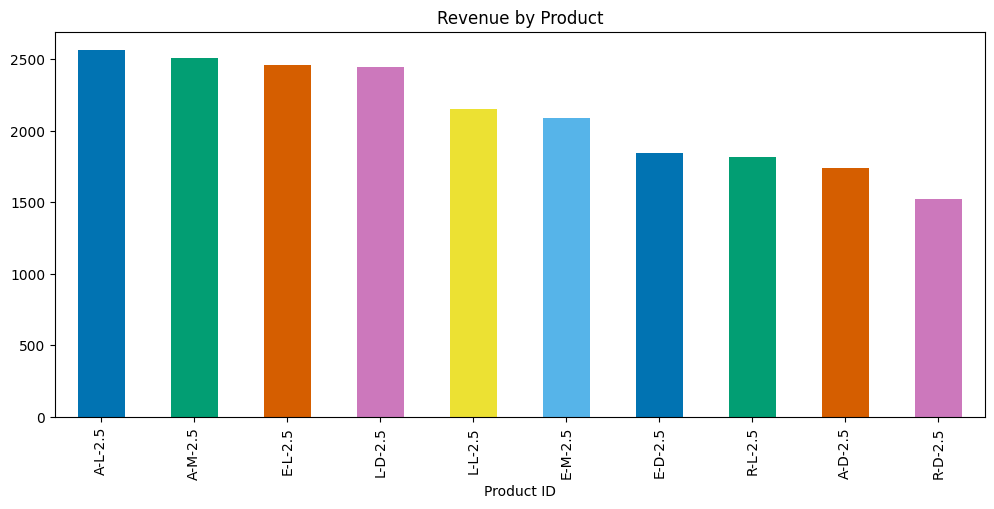

In [28]:
# creating a column chart
productRevenue = productsOrderMerge.groupby('Product ID')['Revenue'].sum().sort_values(ascending=False).head(10)
productRevenue.plot(
    kind = 'bar', 
    color = sns.color_palette('colorblind6'), 
    figsize=(12,5),
    title='Revenue by Product'
    )

##### Arabica coffee of size large 2.5 constituted the most revenue at $2561. <br> The product that generated the least revenue was Robusta medium-sized 0.2 at only $176

### 7. What was the `revenue trend` by **year**?**

In [29]:
productsOrderMerge.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue
0,QEV-37451-860,9/05/2019,17670-51384-MA,R-M-1,2,Rob,9.950,19.90
1,QEV-37451-860,9/05/2019,17670-51384-MA,E-M-0.5,5,Exc,8.250,41.25
2,FAA-43335-268,17/06/2021,21125-22134-PX,A-L-1,1,Ara,12.950,12.95
3,KAC-83089-793,15/07/2021,23806-46781-OU,E-M-1,2,Exc,13.750,27.50
4,KAC-83089-793,15/07/2021,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.97


In [30]:
productsOrderMerge.info() # The Order Date is an object, hence we need to change it to a date type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Order ID     1000 non-null   object 
 1   Order Date   1000 non-null   object 
 2   Customer ID  1000 non-null   object 
 3   Product ID   1000 non-null   object 
 4   Quantity     1000 non-null   int64  
 5   Coffee Type  1000 non-null   object 
 6   Unit Price   1000 non-null   float64
 7   Revenue      1000 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [31]:
productsOrderMerge['Order Date'] = pd.to_datetime(productsOrderMerge['Order Date'], dayfirst=True)
productsOrderMerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order ID     1000 non-null   object        
 1   Order Date   1000 non-null   datetime64[ns]
 2   Customer ID  1000 non-null   object        
 3   Product ID   1000 non-null   object        
 4   Quantity     1000 non-null   int64         
 5   Coffee Type  1000 non-null   object        
 6   Unit Price   1000 non-null   float64       
 7   Revenue      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [32]:
# Extracting the year from the date
productsOrderMerge['Year'] = productsOrderMerge['Order Date'].dt.year
productsOrderMerge.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue,Year
0,QEV-37451-860,2019-05-09,17670-51384-MA,R-M-1,2,Rob,9.950,19.90,2019
1,QEV-37451-860,2019-05-09,17670-51384-MA,E-M-0.5,5,Exc,8.250,41.25,2019
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Ara,12.950,12.95,2021
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Exc,13.750,27.50,2021
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.97,2021


In [33]:
yearRevenue = productsOrderMerge.groupby('Year')['Revenue'].sum().astype(int)
yearRevenue

Year
2019    12187
2020    12117
2021    13766
2022     7063
Name: Revenue, dtype: int32

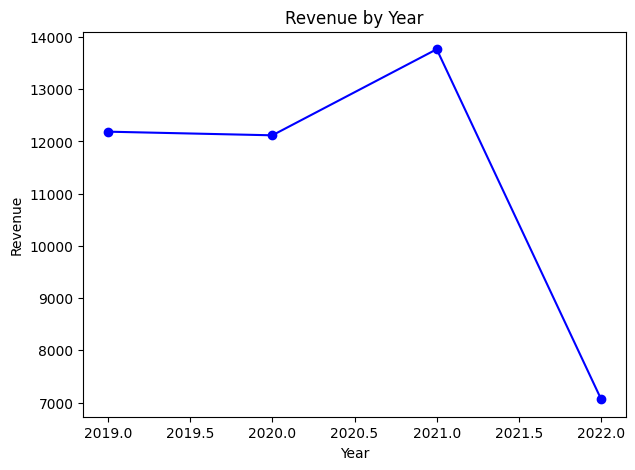

In [34]:
# Visualising the years' revenue using a line chart
yearRevenue = productsOrderMerge.groupby('Year')['Revenue'].sum()
yearRevenue.plot(
    kind='line',
    marker='o',
    color='blue',
    ylabel='Revenue',
    xlabel='Year',
    title='Revenue by Year',
    figsize=(7, 5)
)
plt.show()

##### The year 2021 observed the peak of revenue generated at $13,766. <br> Contrarily, 2022 was the least performed year by revenue at $7063, a sharp decline from the previous year. <br> There was a rise in revenue collected from 2020 to 2021

### 8. What was the `revenue trend` by **month**?

In [35]:
# Extracting the month from the Date column
productsOrderMerge['Month Num'] = productsOrderMerge['Order Date'].dt.month_name()
productsOrderMerge.head()

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue,Year,Month Num
0,QEV-37451-860,2019-05-09,17670-51384-MA,R-M-1,2,Rob,9.950,19.90,2019,May
1,QEV-37451-860,2019-05-09,17670-51384-MA,E-M-0.5,5,Exc,8.250,41.25,2019,May
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Ara,12.950,12.95,2021,June
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Exc,13.750,27.50,2021,July
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.97,2021,July


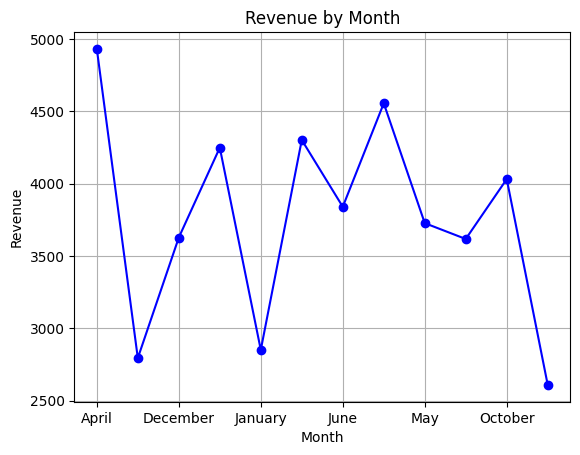

In [36]:
# Visualising the monthly revenue
monthlyRevenue = productsOrderMerge.groupby('Month Num')['Revenue'].sum()
monthlyRevenue.plot(
    kind = 'line',
    marker = 'o',
    color = 'blue',
    ylabel = 'Revenue',
    xlabel = 'Month',
    title = 'Revenue by Month',
)
plt.grid(True)
plt.show()

### 9. Which `coffee type` was mostly ordered?

In [37]:
coffeeTypeOrdered = productsOrderMerge.groupby('Coffee Type')['Quantity'].count().sort_values(ascending=False)
coffeeTypeOrdered

Coffee Type
Ara    264
Lib    248
Exc    247
Rob    241
Name: Quantity, dtype: int64

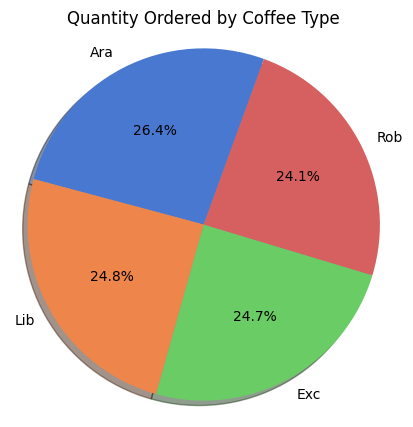

In [38]:
# Creating a pie chart, visualising the distribution of the different coffee types
coffeeTypeOrdered = productsOrderMerge.groupby('Coffee Type')['Quantity'].count().sort_values(ascending=False)
data = coffeeTypeOrdered.values
labels = coffeeTypeOrdered.index.tolist()
colors = sns.color_palette('muted')
plt.figure(figsize=(5,5))
plt.pie(
    data, 
    colors = colors, 
    labels = labels, 
    autopct='%1.1f%%',
    startangle=70,
    shadow = True
    )
plt.axis('equal')
plt.title('Quantity Ordered by Coffee Type')
plt.show()

##### Arabica was the most popular ordered coffee type (26.4%) unlike Robusta which was the least ordered type at 24.1%.

In [39]:
productsOrderMerge

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue,Year,Month Num
0,QEV-37451-860,2019-05-09,17670-51384-MA,R-M-1,2,Rob,9.950,19.900,2019,May
1,QEV-37451-860,2019-05-09,17670-51384-MA,E-M-0.5,5,Exc,8.250,41.250,2019,May
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Ara,12.950,12.950,2021,June
3,KAC-83089-793,2021-07-15,23806-46781-OU,E-M-1,2,Exc,13.750,27.500,2021,July
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.970,2021,July
...,...,...,...,...,...,...,...,...,...,...
995,RLM-96511-467,2020-06-01,43014-53743-XK,R-L-2.5,1,Rob,27.485,27.485,2020,June
996,AEZ-13242-456,2022-04-05,62494-09113-RP,R-M-0.5,5,Rob,5.970,29.850,2022,April
997,UME-75640-698,2019-11-10,62494-09113-RP,A-M-0.5,4,Ara,6.750,27.000,2019,November
998,GJC-66474-557,2021-03-08,64965-78386-MY,A-D-1,1,Ara,9.950,9.950,2021,March


In [40]:
# Filtering only Robusta coffee type
robustaCoffee = productsOrderMerge[productsOrderMerge['Coffee Type'] == 'Rob']
robustaCoffee

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue,Year,Month Num
0,QEV-37451-860,2019-05-09,17670-51384-MA,R-M-1,2,Rob,9.950,19.900,2019,May
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.970,2021,July
8,EZT-46571-659,2019-02-01,03396-68805-ZC,R-M-0.5,3,Rob,5.970,17.910,2019,February
9,NWQ-70061-912,2019-05-09,61021-27840-ZN,R-M-0.5,1,Rob,5.970,5.970,2019,May
12,SZW-48378-399,2022-02-07,34136-36674-OM,R-M-1,5,Rob,9.950,49.750,2022,February
...,...,...,...,...,...,...,...,...,...,...
982,SNZ-44595-152,2022-12-08,06136-65250-PG,R-L-1,2,Rob,11.950,23.900,2022,December
985,LHX-81117-166,2021-12-31,01282-28364-RZ,R-L-1,4,Rob,11.950,47.800,2021,December
988,GNL-98714-885,2020-07-03,83731-53280-YC,R-M-1,3,Rob,9.950,29.850,2020,July
995,RLM-96511-467,2020-06-01,43014-53743-XK,R-L-2.5,1,Rob,27.485,27.485,2020,June


In [41]:
# Filtering Robusta and Arabica coffee types
arabicaRobusta = productsOrderMerge[productsOrderMerge['Coffee Type'].isin(['Rob', 'Ara'])]
arabicaRobusta

,Order ID,Order Date,Customer ID,Product ID,Quantity,Coffee Type,Unit Price,Revenue,Year,Month Num
0,QEV-37451-860,2019-05-09,17670-51384-MA,R-M-1,2,Rob,9.950,19.900,2019,May
2,FAA-43335-268,2021-06-17,21125-22134-PX,A-L-1,1,Ara,12.950,12.950,2021,June
4,KAC-83089-793,2021-07-15,23806-46781-OU,R-L-2.5,2,Rob,27.485,54.970,2021,July
8,EZT-46571-659,2019-02-01,03396-68805-ZC,R-M-0.5,3,Rob,5.970,17.910,2019,February
9,NWQ-70061-912,2019-05-09,61021-27840-ZN,R-M-0.5,1,Rob,5.970,5.970,2019,May
...,...,...,...,...,...,...,...,...,...,...
994,XBV-40336-071,2021-02-17,38536-98293-JZ,A-D-0.2,3,Ara,2.985,8.955,2021,February
995,RLM-96511-467,2020-06-01,43014-53743-XK,R-L-2.5,1,Rob,27.485,27.485,2020,June
996,AEZ-13242-456,2022-04-05,62494-09113-RP,R-M-0.5,5,Rob,5.970,29.850,2022,April
997,UME-75640-698,2019-11-10,62494-09113-RP,A-M-0.5,4,Ara,6.750,27.000,2019,November
